Projekat : </br> Analiza podataka i generisanje razlicitih deep learning modela koristeci konvolucione neuralne mreze. </br>
Dataset sadrzi oko 17000 slika zivotinja, koje su po vrsti klasifikovane u 9 klasa. 

In [ ]:
!pip install tqdm

In [ ]:
import cv2
import numpy as np
import os

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from keras.layers import Conv2D, MaxPooling2D,Rescaling

from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.datasets import mnist
from keras.models import Sequential,Model

import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.preprocessing import image
from tqdm import tqdm,tqdm_notebook

In [ ]:
x = []
y = []

In [ ]:
class_label_encoding = { #enumeracija klasa
    'sheep': 0,
    'spider': 1,
    'elephant': 2,
    'dog': 3,
    'chicken': 4,
    'cow': 5,
    'cat': 6,
    'butterfly': 7,
    'squirrel': 8
}

- ucitavanje slika iz foldera u nizove </br>
  - u niz x stavljam same slike
  - u niz y stavljam njihove label-e

In [ ]:
parent_dir = '/content/drive/MyDrive/dl/Animals-10'

for directory in os.listdir(parent_dir):
    if('.txt' in directory): continue
    for file in os.listdir(parent_dir+'/'+directory):
        image_path = parent_dir+'/'+directory+'/'+file
        img = cv2.imread(image_path,0) # convert images as grayscale
        img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
        x.append(img)
        y.append(class_label_encoding[directory])

In [ ]:
x = np.array(x)
x = x.reshape(x.shape[0], x.shape[1], x.shape[2])
x.shape

(23339, 28, 28)

In [ ]:
y = np.array(y)

- Podela podataka na trening i test podatke, takodje na x i y tj data i label

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=987654, stratify=y)
del x, y

In [ ]:
import matplotlib.pyplot as plt

- Analiza podataka </br>
 - ovde se vidi kratak pregled dataset-a, cisto da imam bolju vizuelizaciju sa cime radim i kako izgledaju slike iz mog dataset-a
 - ono sto je takodje bitno jeste da se vidi da sam tacno klasifikovala podatke, i da nema odstupanja u slaganju slike sa labelom

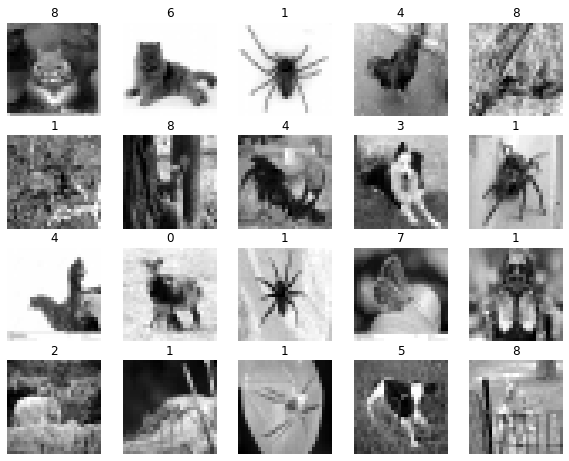

In [ ]:
plt.figure(figsize=(10, 10))
for ind in range(20):
    # print(type(images),type(labels))
    ax = plt.subplot(5, 5, ind + 1)
    plt.imshow(x_train[ind], cmap='gray')
    plt.title(y_train[ind])
    plt.axis("off")

In [ ]:
print(x_train.shape)
print(y_train.shape)

(17504, 28, 28)
(17504,)


In [ ]:
print(x_train[1].shape)

(28, 28)


In [ ]:
def img2np(images,labels, size = (16, 16)):
    # iterating through each file
    full_mats = {}
    for im,lab in tqdm(zip(images,labels)):
      img_ts = image.img_to_array(im)

      img_ts = [img_ts.ravel()]
      if lab in full_mats:
        full_mats[lab] = np.concatenate((full_mats[lab], img_ts))
      else:
        full_mats[lab] = img_ts
    return full_mats

In [ ]:
matrices = img2np(x_train,y_train)

17504it [00:09, 1809.72it/s]


In [ ]:
print(matrices)

{8: array([[100.,  90.,  98., ..., 125., 151., 165.],
       [175., 173., 170., ..., 221., 225., 221.],
       [ 18.,  32.,  17., ..., 100.,  93., 128.],
       ...,
       [ 78.,  76., 113., ...,  85.,  94.,  93.],
       [ 62.,  62.,  80., ...,  75.,  75.,  55.],
       [157., 145., 145., ..., 236., 237., 243.]], dtype=float32), 6: array([[253., 253., 253., ..., 254., 253., 253.],
       [ 78.,  90.,  90., ..., 136., 138., 118.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       ...,
       [ 80.,  66.,  42., ...,  77.,  72.,  48.],
       [ 63.,  63.,  83., ...,  78.,  56.,  44.],
       [ 43.,  41.,  44., ..., 116., 108., 116.]], dtype=float32), 1: array([[253., 253., 253., ..., 253., 253., 253.],
       [ 66.,  72.,  66., ...,  71.,  75., 112.],
       [146., 138., 175., ..., 172., 159., 185.],
       ...,
       [200., 199., 211., ..., 159., 142., 169.],
       [155., 167., 189., ..., 160., 145., 154.],
       [116., 107.,  89., ..., 123., 124., 124.]], dtype=float32), 4: 

- Ovde izvlacim vizuelizaciju proseka za svaku od mojih klasa, kako bih uocila neke oblike koji su najzastupljeniji i mozda uocila neku slicnost izmedju odredjenih klasa 

In [ ]:
def find_mean_img(full_mat, title, size = (28, 28)):
    # calculate the average
    print(full_mat.shape)
    mean_img = np.mean(full_mat, axis = 0)
    print(mean_img.shape)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='hsv')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

(1365, 784)
(784,)


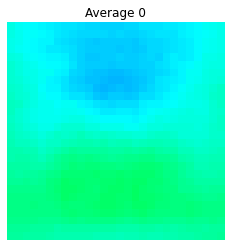

(3623, 784)
(784,)


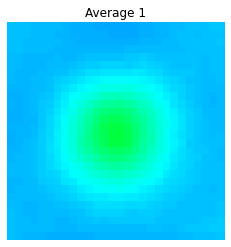

(1085, 784)
(784,)


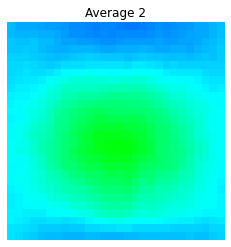

(3647, 784)
(784,)


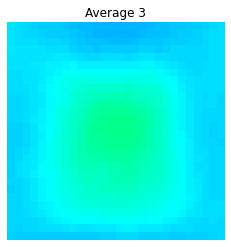

(2108, 784)
(784,)


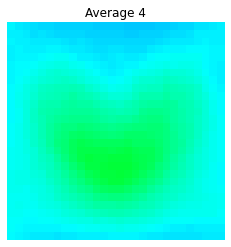

(1437, 784)
(784,)


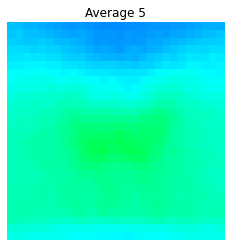

(1251, 784)
(784,)


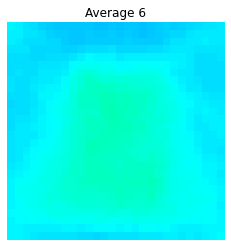

(1584, 784)
(784,)


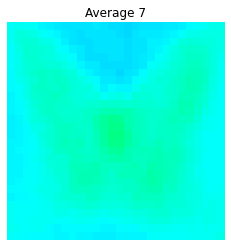

(1404, 784)
(784,)


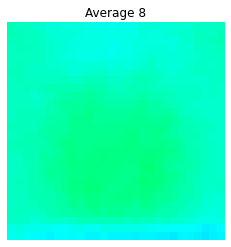

In [ ]:
mean_images = []
for ind in range(9):
  mean_images.append(find_mean_img(matrices[ind],ind))

- ovde se vidi razlika izmedju dve izabrane klase

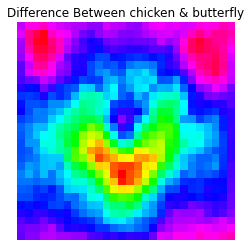

In [ ]:
contrast_mean_4_7 = mean_images[4] - mean_images[7]
plt.imshow(contrast_mean_4_7, cmap='hsv')
plt.title(f'Difference Between chicken & butterfly')
plt.axis('off')
plt.show()

- Eigen images

Number of PC:  16


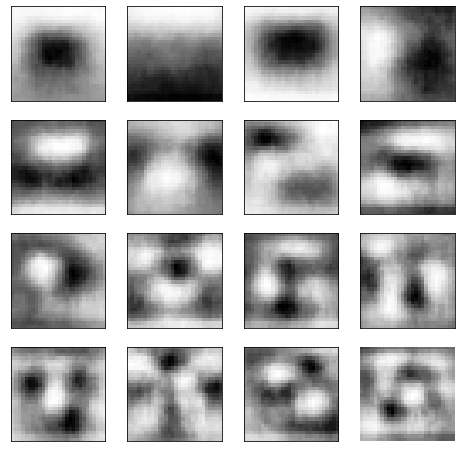

Number of PC:  4


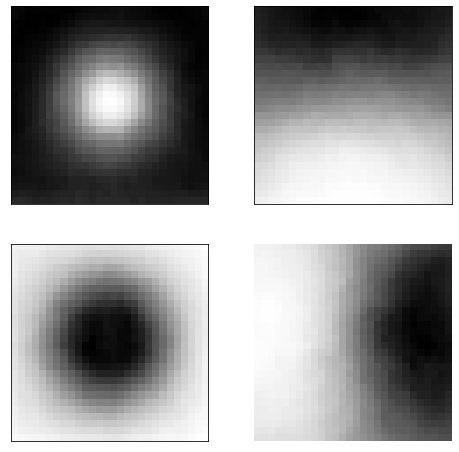

Number of PC:  14


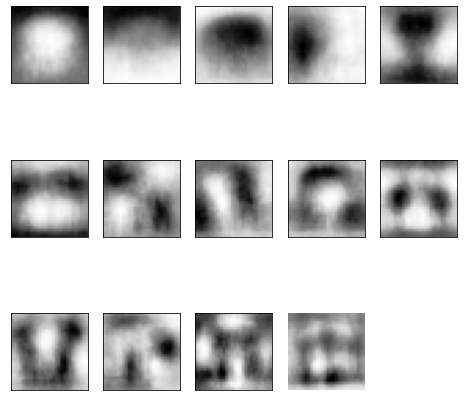

Number of PC:  11


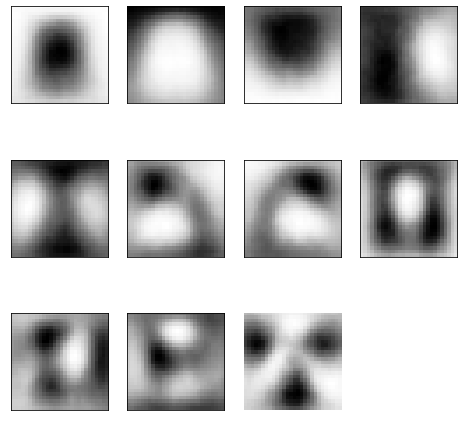

Number of PC:  13


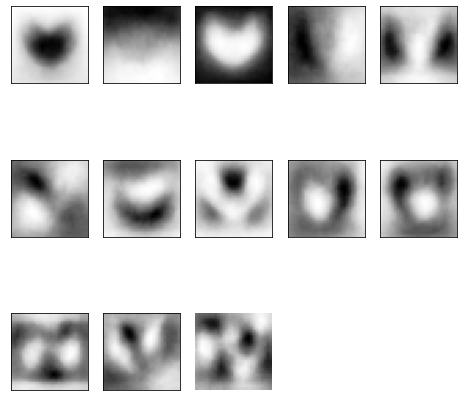

Number of PC:  16


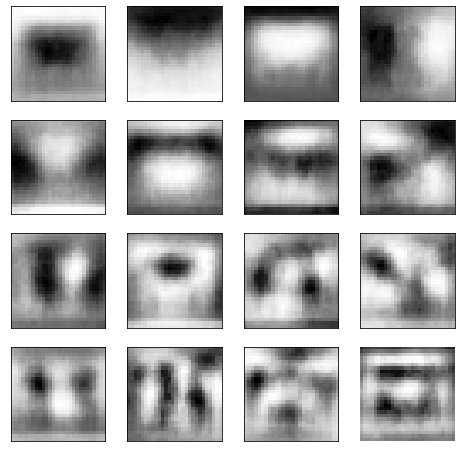

Number of PC:  8


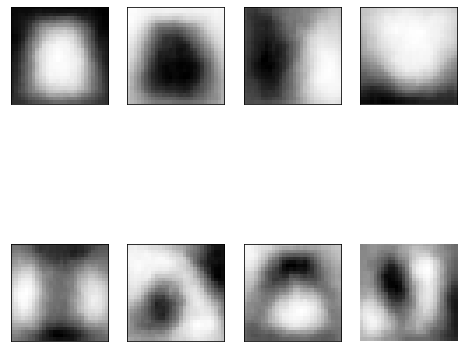

Number of PC:  9


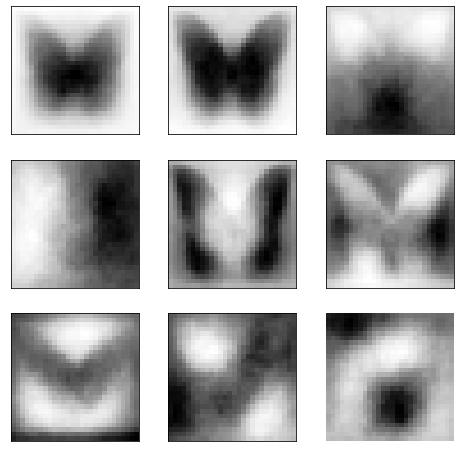

Number of PC:  15


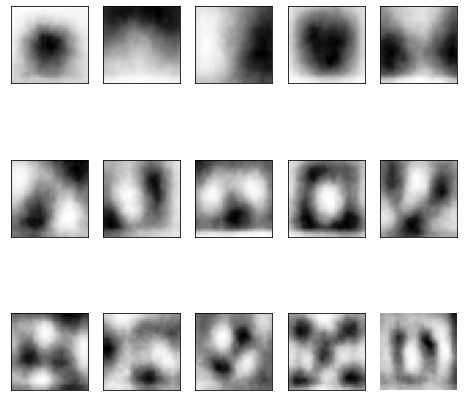

In [ ]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (28, 28)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (28, 28)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()
for i in range(9):
  plot_pca(eigenimages(matrices[i], f'{i}'))


- Klasican CNN model, bez regularizacije, sa relu aktivacionom funkcijom i Adam optimizatorom. Model se trenira u 20 epoha, posto u ovom slucaju sa smanjenom rezolucijom slike smanjuje se i tacnost modela. (imala sam veci accuracy kada je bila veca rezolucija) Zbog toga sam odlucila da pokusam da pustim da malo duze trenira.

In [ ]:
def CNN_model(image_height,image_width,num_classes,augment=True):
  model = Sequential()



  model.add(Rescaling(1.0/255,input_shape=(image_height, image_width, 1)))
  model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(Dropout(rate=0.66))
  
  model.add(Flatten())
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dense(num_classes))

  model.add(Activation('softmax'))


  model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

  return model

In [ ]:
model = CNN_model(28,28,9)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                        

In [ ]:
epochas = 20
model.fit(x_train,y_train,validation_split=0.2,epochs=epochas,validation_freq=2,workers=4)#,callbacks=[cp_callback])

Epoch 1/20
438/438 [==============================] - 26s 57ms/step - loss: 1.9124 - accuracy: 0.3164
Epoch 2/20
438/438 [==============================] - 25s 57ms/step - loss: 1.6651 - accuracy: 0.4186 - val_loss: 1.5670 - val_accuracy: 0.4593
Epoch 3/20
438/438 [==============================] - 20s 46ms/step - loss: 1.4922 - accuracy: 0.4844
Epoch 4/20
438/438 [==============================] - 24s 55ms/step - loss: 1.3632 - accuracy: 0.5235 - val_loss: 1.3773 - val_accuracy: 0.5278
Epoch 5/20
438/438 [==============================] - 20s 46ms/step - loss: 1.2604 - accuracy: 0.5625
Epoch 6/20
438/438 [==============================] - 25s 56ms/step - loss: 1.1620 - accuracy: 0.6019 - val_loss: 1.3145 - val_accuracy: 0.5418
Epoch 7/20
438/438 [==============================] - 20s 47ms/step - loss: 1.0624 - accuracy: 0.6355
Epoch 8/20
438/438 [==============================] - 23s 52ms/step - loss: 0.9620 - accuracy: 0.6694 - val_loss: 1.3275 - val_accuracy: 0.5576
Epoch 9/20
438/4

- Zakljucak : model deluje prilicno overfitovano, zbog toga sto je na training-u accuracy dostigao oko 90%, dok na validation-u imam slab accuracy od oko 53%. Ovaj problem kasnije pokusavam da resim regularizacijom.

In [ ]:
obj = model.evaluate(x_test,y_test)
print(obj)

183/183 [==============================] - 2s 14ms/step - loss: 1.9070 - accuracy: 0.5277
[1.9069544076919556, 0.5276778340339661]


- Model sa alternativnom optimizacijom : Adagrad
 - sve ostalo je isto kao u orvom modelu

In [ ]:
def CNN_model2(image_height,image_width,num_classes,augment=True):
  model = Sequential()



  model.add(Rescaling(1.0/255,input_shape=(image_height, image_width, 1)))
  model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(Dropout(rate=0.66))
  
  model.add(Flatten())
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dense(num_classes))

  model.add(Activation('softmax'))


  model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adagrad',
              metrics=['accuracy'])

  return model

In [ ]:
model2 = CNN_model2(28,28,9)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                      

In [ ]:
epochas = 20
model2.fit(x_train,y_train,validation_split=0.2,epochs=epochas,validation_freq=2,workers=4)#,callbacks=[cp_callback])

Epoch 1/20
438/438 [==============================] - 22s 49ms/step - loss: 2.1004 - accuracy: 0.2098
Epoch 2/20
438/438 [==============================] - 22s 50ms/step - loss: 2.0838 - accuracy: 0.2148 - val_loss: 2.0768 - val_accuracy: 0.2025
Epoch 3/20
438/438 [==============================] - 20s 47ms/step - loss: 2.0777 - accuracy: 0.2210
Epoch 4/20
438/438 [==============================] - 24s 55ms/step - loss: 2.0721 - accuracy: 0.2215 - val_loss: 2.0629 - val_accuracy: 0.2179
Epoch 5/20
438/438 [==============================] - 20s 47ms/step - loss: 2.0667 - accuracy: 0.2289
Epoch 6/20
438/438 [==============================] - 23s 53ms/step - loss: 2.0625 - accuracy: 0.2294 - val_loss: 2.0499 - val_accuracy: 0.2374
Epoch 7/20
438/438 [==============================] - 20s 46ms/step - loss: 2.0568 - accuracy: 0.2344
Epoch 8/20
438/438 [==============================] - 23s 53ms/step - loss: 2.0515 - accuracy: 0.2398 - val_loss: 2.0365 - val_accuracy: 0.2488
Epoch 9/20
438/4

- Zakljucak : sa Adagrad optimizacijom sam dobila drasticno losije rezultate, pa bih definitivno izabrala Adam, ili eventualno istestirala kako rade ostale optimizacije i mozda izabrala neku trecu.

In [ ]:
obj = model2.evaluate(x_test,y_test)
print(obj)

183/183 [==============================] - 3s 14ms/step - loss: 1.9702 - accuracy: 0.2850
[1.9701790809631348, 0.28500428795814514]


- Model sa modifikovanjem dataseta (data augmentation)
  - data augmentation mi sluzi da posirim svoj dataset tako sto cu vec postojece slike proizvoljno modifikovati

In [ ]:
def CNN_model3(image_height,image_width,num_classes,augment=True):
  model = Sequential()



  model.add(Rescaling(1.0/255,input_shape=(image_height, image_width, 1)))
  model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(Dropout(rate=0.66))
  
  model.add(Flatten())
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dense(num_classes))

  model.add(Activation('softmax'))


  model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adagrad',
              metrics=['accuracy'])

  return model

In [ ]:
X_train = x_train.reshape(-1,28,28,1)
X_test = x_test.reshape(-1,28,28,1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    fill_mode='nearest',
    validation_split = 0.2
    )

datagen.fit(X_train)

train_generator = datagen.flow(X_train, y_train, batch_size=60, subset='training')

validation_generator = datagen.flow(X_train, y_train, batch_size=60, subset='validation')

In [ ]:
model3 = CNN_model3(28,28,9)
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                        

In [ ]:
# fits the model on batches with real-time data augmentation:
epochas = 20
model3.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    epochs = epochas,
                    workers=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
234/234 [==============================] - 35s 145ms/step - loss: 2.1756 - accuracy: 0.2049 - val_loss: 2.1508 - val_accuracy: 0.2017
Epoch 2/20
234/234 [==============================] - 34s 143ms/step - loss: 2.1235 - accuracy: 0.2084 - val_loss: 2.1003 - val_accuracy: 0.2017
Epoch 3/20
234/234 [==============================] - 37s 155ms/step - loss: 2.0964 - accuracy: 0.2071 - val_loss: 2.0939 - val_accuracy: 0.2017
Epoch 4/20
234/234 [==============================] - 35s 147ms/step - loss: 2.0934 - accuracy: 0.2085 - val_loss: 2.0934 - val_accuracy: 0.2009
Epoch 5/20
234/234 [==============================] - 35s 146ms/step - loss: 2.0927 - accuracy: 0.2099 - val_loss: 2.0932 - val_accuracy: 0.1986
Epoch 6/20
234/234 [==============================] - 39s 165ms/step - loss: 2.0940 - accuracy: 0.2067 - val_loss: 2.0931 - val_accuracy: 0.2114
Epoch 7/20
234/234 [==============================] - 35s 148ms/step - loss: 2.0941 - accuracy: 0.2109 - val_loss: 2.0929 - val_ac

In [ ]:
obj = model3.evaluate(x_test,y_test)
print(obj)

183/183 [==============================] - 4s 21ms/step - loss: 2.4177 - accuracy: 0.2185
[2.417725086212158, 0.2185090035200119]


- Model sa regularizacijom

In [ ]:
def CNN_model4(image_height,image_width,num_classes,augment=True):
  model = Sequential()



  model.add(Rescaling(1.0/255,input_shape=(image_height, image_width, 1)))
  model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(Dropout(rate=0.66))
  
  model.add(Flatten())
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dense(num_classes,kernel_regularizer=tf.keras.regularizers.l1(0.01)))

  model.add(Activation('softmax'))


  model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

  return model

In [ ]:
model4 = CNN_model4(28,28,9)
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                      

In [ ]:
epochas = 20
model4.fit(x_train,y_train,validation_split=0.2,epochs=epochas,validation_freq=2,workers=4)#,callbacks=[cp_callback])

Epoch 1/20
438/438 [==============================] - 36s 81ms/step - loss: 2.2770 - accuracy: 0.2807
Epoch 2/20
438/438 [==============================] - 41s 93ms/step - loss: 1.8847 - accuracy: 0.3590 - val_loss: 1.8039 - val_accuracy: 0.3873
Epoch 3/20
438/438 [==============================] - 37s 84ms/step - loss: 1.7760 - accuracy: 0.3981
Epoch 4/20
438/438 [==============================] - 38s 86ms/step - loss: 1.6817 - accuracy: 0.4273 - val_loss: 1.6572 - val_accuracy: 0.4413
Epoch 5/20
438/438 [==============================] - 36s 82ms/step - loss: 1.6127 - accuracy: 0.4575
Epoch 6/20
438/438 [==============================] - 41s 93ms/step - loss: 1.5540 - accuracy: 0.4805 - val_loss: 1.5846 - val_accuracy: 0.4807
Epoch 7/20
438/438 [==============================] - 36s 81ms/step - loss: 1.4915 - accuracy: 0.5060
Epoch 8/20
438/438 [==============================] - 38s 86ms/step - loss: 1.4462 - accuracy: 0.5196 - val_loss: 1.5327 - val_accuracy: 0.4959
Epoch 9/20
438/4

- Zakljucak : overfitovanje je definitivno smanjeno, manja je razlika izmedju training i validation (67% - 52%), ali nije resen problem slabog accuracy-a.

In [ ]:
obj = model4.evaluate(x_test,y_test)
print(obj)

183/183 [==============================] - 4s 20ms/step - loss: 1.5296 - accuracy: 0.5225
[1.5295904874801636, 0.5225363969802856]


- Model sa alternativnom aktivacionom funkcijom (Sigmoid)

In [ ]:
def CNN_model5(image_height,image_width,num_classes,augment=True):
  model = Sequential()



  model.add(Rescaling(1.0/255,input_shape=(image_height, image_width, 1)))
  model.add(Conv2D(32,(3,3),padding='same',activation='sigmoid'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),padding='same',activation='sigmoid'))
  model.add(Dropout(rate=0.66))
  
  model.add(Flatten())
  model.add(Dense(256))
  model.add(Activation('sigmoid'))
  model.add(Dense(num_classes))

  model.add(Activation('softmax'))


  model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

  return model

In [ ]:
model5 = CNN_model5(28,28,9)
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 12544)             0         
                                                      

In [ ]:
epochas = 20
model5.fit(x_train,y_train,validation_split=0.2,epochs=epochas,validation_freq=2,workers=4)#,callbacks=[cp_callback])

Epoch 1/20
438/438 [==============================] - 41s 91ms/step - loss: 2.1451 - accuracy: 0.2039
Epoch 2/20
438/438 [==============================] - 39s 89ms/step - loss: 2.1076 - accuracy: 0.2122 - val_loss: 2.1118 - val_accuracy: 0.1982
Epoch 3/20
438/438 [==============================] - 37s 86ms/step - loss: 2.1069 - accuracy: 0.2068
Epoch 4/20
438/438 [==============================] - 38s 86ms/step - loss: 2.1059 - accuracy: 0.2055 - val_loss: 2.1056 - val_accuracy: 0.2168
Epoch 5/20
438/438 [==============================] - 39s 90ms/step - loss: 2.1049 - accuracy: 0.2090
Epoch 6/20
438/438 [==============================] - 38s 88ms/step - loss: 2.1063 - accuracy: 0.2101 - val_loss: 2.0971 - val_accuracy: 0.1982
Epoch 7/20
438/438 [==============================] - 37s 84ms/step - loss: 2.1042 - accuracy: 0.2075
Epoch 8/20
438/438 [==============================] - 41s 94ms/step - loss: 2.1050 - accuracy: 0.2070 - val_loss: 2.1131 - val_accuracy: 0.1982
Epoch 9/20
438/4

- Zakljucak : relu je dao mnogo bolje rezultate, pa bih odabrala relu umesto sigmoid, ili eventualno neku trecu opciju koja se bolje pokaze.

In [ ]:
obj = model5.evaluate(x_test,y_test)
print(obj)

183/183 [==============================] - 4s 23ms/step - loss: 2.1111 - accuracy: 0.2070
[2.11110520362854, 0.20702657103538513]
